# I) Summary

**DISCLAIMER**: We will use a simplier version of the LeNet-5 than the one in the [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). (For example, computation on average pooling layers described in the paper are slightly more complex than usual).

LeNet-5 has:

- 2 Convolutional layers.
- 3 Fully connected layers.
- 2 Average pooling layers.
- Tanh as activation function for hidden layer.
- Softmax as activation function for output layer.
- 60000 trainable parameters.
- Cross-entropy as cost function
- Gradient descent as optimizer. (We will use Adam because it leads to better result)

LeNet-5 is:

- trained on MNIST dataset (60000 training examples).
- trained over 20 epoch.

LeNet-5 is expected to:
- converge after 10-12 epoch.
- have an error rate of 0.95% on test set. (Using accuracy as mettric)

![legend](../img/legend.png)

![LeNet-5 model](../img/lenet5-model.png)

# II) Implementation

In [131]:
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## a) Loading dataset / Preprocessing

Notice:

- Pytorch let us preprocess our data (reshaping, normalizing) while loading our data.

In [291]:
def load_mnist(normalize=False):
    transform_list = [transforms.Resize((32,32)), transforms.ToTensor()]
    
    if normalize:
        # Normalize images over 1 channel in the range [-1,1].
        # image[channel] = (image[channel] - mean[channel]) / std[channel]
        # PROOF: 
        # if image[channel] = 0 (minimum value) then (0 - 0.5) / 0.5 = -1.
        # if image[channel] = 1 (maximum value) then (1 - 0.5) / 0.5  = 1.
        # Thus it normalize images in the range of [-1,1].
        transform_list.append(transforms.Normalize(mean=[0.5], std=[0.5]))
        
    transform = transforms.Compose(transform_list)
    
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
    
 
    train_dataset, val_dataset = random_split(train_dataset, (55000, 5000))
    
    print("Image Shape: {}".format(train_dataset[0][0].numpy().shape), end = '\n\n')
    print("Training Set:   {} samples".format(len(train_dataset)))
    print("Validation Set:   {} samples".format(len(val_dataset)))
    print("Test Set:       {} samples".format(len(test_dataset)))
    
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)
    
    return (train_loader, val_loader, test_loader)

In [292]:
train_loader, val_loader, test_loader = load_mnist(normalize=True)

Image Shape: (1, 32, 32)

Training Set:   55000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


## b) Visualization

In [293]:
def plot_example(X, y, y_pred=None):
    """
        Plots 9 examples and their associate labels.
        
        Parameters:
        -X: Training examples.
        -y: true labels.
        -y_pred: predicted labels.
    """
    # Create figure with 3 x 3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
     
    X, y = X[:9, 0, ...], y[:9] 
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(X[i])

        # Show true and predicted classes.
        if y_pred is None:
            xlabel = "True: {0}".format(y[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(y[i], y_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots in a single Notebook cell.
    plt.show()

In [294]:
def plot_example_errors(X, y, y_pred):
    """
        Plots 9 example errors and their associate true/predicted labels.
        
        Parameters:
        -X: Training examples.
        -y: true labels.
        -y_pred: predicted labels.
    
    """
    incorrect = (y != y_pred)
 
    X = X[incorrect]
    y = y[incorrect]
    y_pred = y_pred[incorrect]
    
    # Plot the first 9 images.
    plot_example(X, y, y_pred)

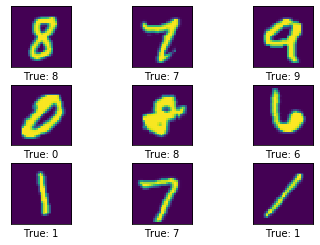

In [295]:
images, labels = iter(train_loader).next()
plot_example(images.numpy(), labels.numpy())

## d) Architecture build